In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('data/4b.cryptonews_ner.parquet')
df.drop(columns=['title', 'text'] , inplace=True)

In [3]:
print(df.shape)
df.head(2)

(155376, 12)


,source_name,date,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa,People,Organizations,Cryptocurrencies,Events
index,,,,,,,,,,,,
0,Forbes,2021-01-02 00:20:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,[],[],[Bitcoin],[]
1,BeInCrypto,2021-01-01 20:31:35+00:00,0.0,0.5,0.0,0.0,0.7,0.0,[Krüger],[Central banks],[Bitcoin],[]


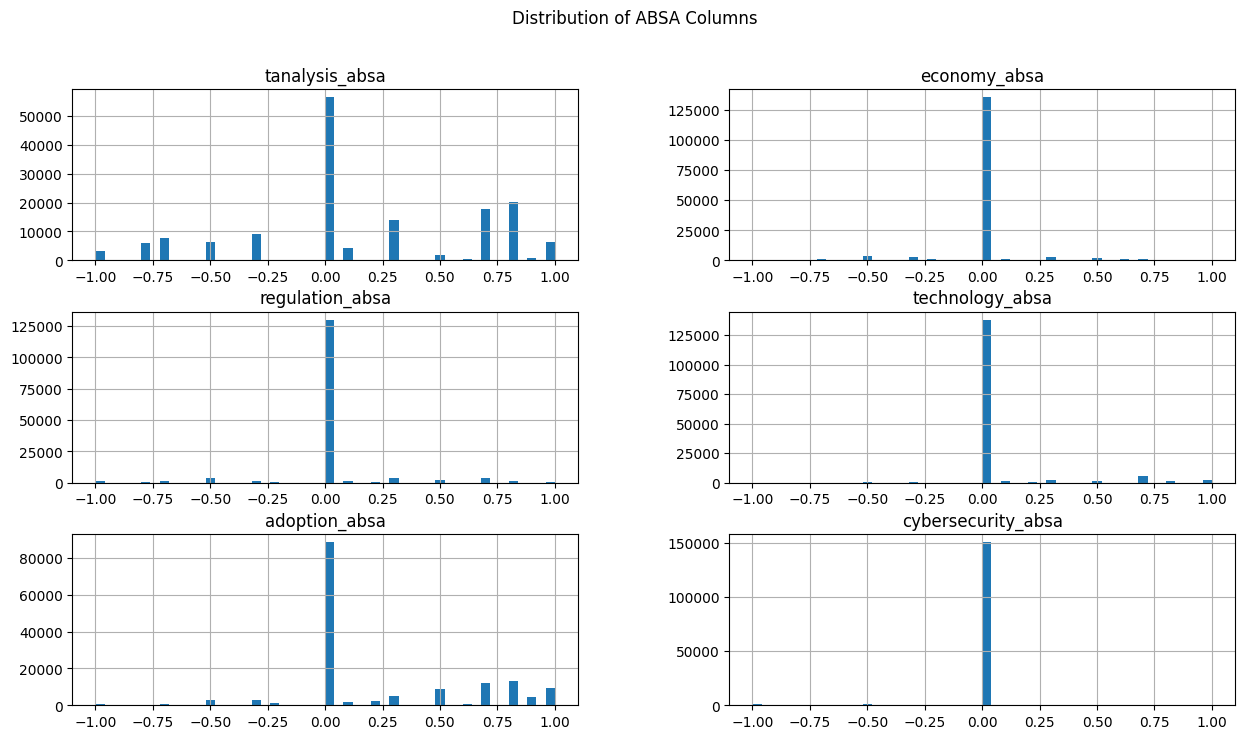

In [4]:
cols = ['tanalysis_absa', 'economy_absa', 'regulation_absa', 'technology_absa', 'adoption_absa', 'cybersecurity_absa']
df[cols].hist(bins=50, figsize=(15, 8))
plt.suptitle('Distribution of ABSA Columns')
plt.show()

In [5]:
cols = ['tanalysis_absa', 'economy_absa', 'regulation_absa', 'technology_absa', 'adoption_absa', 'cybersecurity_absa']
df[cols] = df[cols].replace(0, pd.NA)
df.head()

,source_name,date,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa,People,Organizations,Cryptocurrencies,Events
index,,,,,,,,,,,,
0,Forbes,2021-01-02 00:20:00+00:00,0.5,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],[Bitcoin],[]
1,BeInCrypto,2021-01-01 20:31:35+00:00,<NA>,0.5,<NA>,<NA>,0.7,<NA>,[Krüger],[Central banks],[Bitcoin],[]
2,Coindesk,2021-01-01 19:15:02+00:00,<NA>,0.3,<NA>,0.5,0.7,<NA>,[Tyrone Ross],[Onramp Invest],[Bitcoin],[]
3,Cointelegraph,2021-01-01 18:52:00+00:00,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],"[BTC, Bitcoin]",[]
4,Bitcoinist,2021-01-01 18:00:00+00:00,0.3,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],"[Bitcoin, BTC]",[]


In [6]:
print("total number of rows in the dataset:", df.shape[0])

df_all_na = df[df[cols].isna().all(axis=1)]
print('number of columns with NA value in all 6 absa columns:', df_all_na.shape[0])

df_non_na = df.dropna(subset=cols, how='all')
print('number of columns with at least one non-NA value in 6 absa columns:', df_non_na.shape[0])

total number of rows in the dataset: 155376
number of columns with NA value in all 6 absa columns: 7860
number of columns with at least one non-NA value in 6 absa columns: 147516


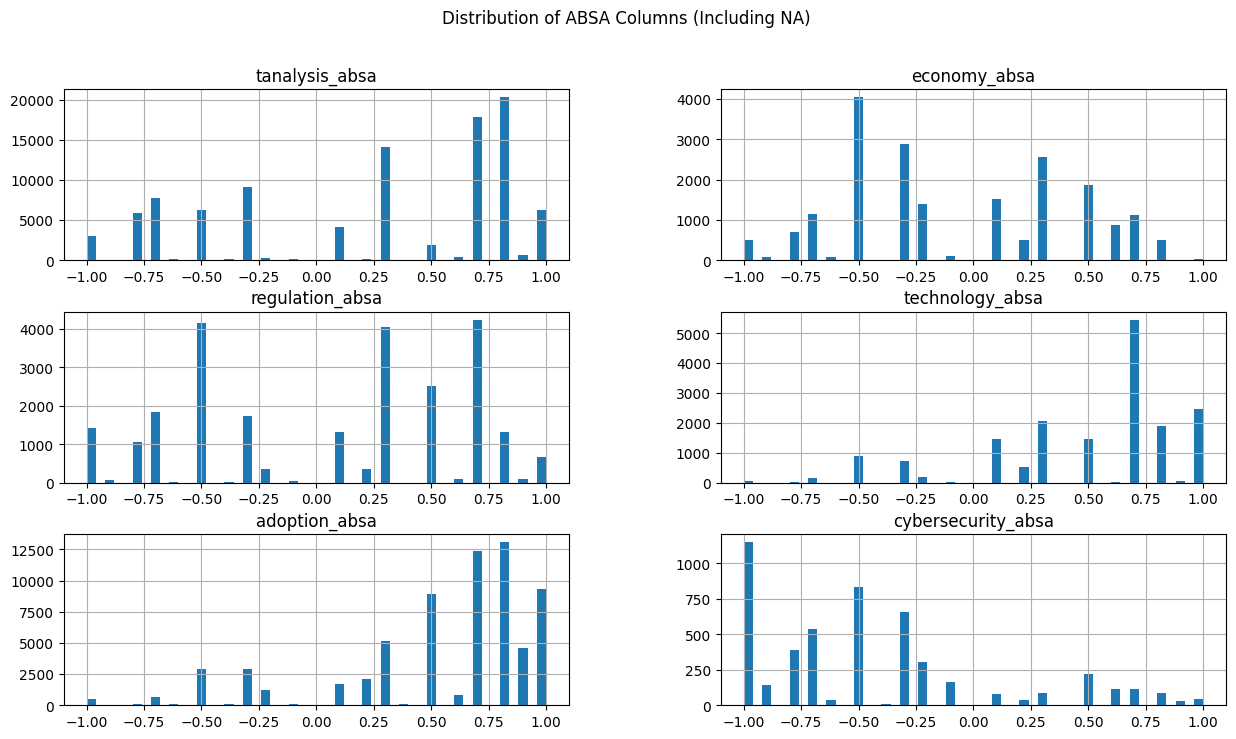

In [7]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df[cols].hist(bins=50, figsize=(15, 8))
plt.suptitle('Distribution of ABSA Columns (Including NA)')
plt.show()

In [8]:
df.head()

,source_name,date,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa,People,Organizations,Cryptocurrencies,Events
index,,,,,,,,,,,,
0,Forbes,2021-01-02 00:20:00+00:00,0.5,NaN,NaN,NaN,NaN,NaN,[],[],[Bitcoin],[]
1,BeInCrypto,2021-01-01 20:31:35+00:00,NaN,0.5,NaN,NaN,0.7,NaN,[Krüger],[Central banks],[Bitcoin],[]
2,Coindesk,2021-01-01 19:15:02+00:00,NaN,0.3,NaN,0.5,0.7,NaN,[Tyrone Ross],[Onramp Invest],[Bitcoin],[]
3,Cointelegraph,2021-01-01 18:52:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,[],[],"[BTC, Bitcoin]",[]
4,Bitcoinist,2021-01-01 18:00:00+00:00,0.3,NaN,NaN,NaN,NaN,NaN,[],[],"[Bitcoin, BTC]",[]


In [9]:
df.count()

source_name           155376
date                  155376
tanalysis_absa         99012
economy_absa           19961
regulation_absa        25384
technology_absa        17537
adoption_absa          66901
cybersecurity_absa      5037
People                155376
Organizations         155376
Cryptocurrencies      155376
Events                155376
dtype: int64

In [10]:
people_freq = df['People'].explode().value_counts()
people_freq.head(20)

People
Michael Saylor          2467
Elon Musk               1670
Donald Trump            1615
Peter Schiff             969
Sally Ho                 940
Cathie Wood              928
Jack Dorsey              879
Nayib Bukele             861
Robert Kiyosaki          815
Satoshi Nakamoto         790
Arthur Hayes             594
Peter Brandt             553
Mike Novogratz           543
Jerome Powell            511
Gary Gensler             499
Anthony Scaramucci       455
Trump                    452
Michaël van de Poppe     377
Mike McGlone             371
Benjamin Cowen           306
Name: count, dtype: int64

In [11]:
organizations_freq = df['Organizations'].explode().value_counts()
organizations_freq.head(20)

Organizations
SEC                       4413
MicroStrategy             3785
BlackRock                 3301
Binance                   2194
Coinbase                  2174
Grayscale                 2114
The Daily Hodl            1823
Federal Reserve           1630
Tesla                     1622
CNBC                      1577
CryptoQuant               1432
Fed                       1403
CryptoSlate               1356
FTX                       1330
Glassnode                 1253
Bloomberg                 1211
El Salvador               1171
The Block                 1119
BeInCrypto                1068
The Currency Analytics     986
Name: count, dtype: int64

In [12]:
people_freq.sum()

np.int64(49626)

In [13]:
cryptocurrencies_freq = df['Cryptocurrencies'].explode().value_counts()
cryptocurrencies_freq.head(20)

Cryptocurrencies
Bitcoin      145001
BTC           51248
Ethereum      13063
ETH            5172
XRP            3227
bitcoin        2759
Dogecoin       2443
Solana         1763
Ether          1455
SOL            1392
DOGE           1291
ADA            1215
BNB            1214
Cardano         882
BTC/USD         859
Shiba Inu       628
SHIB            566
DOT             546
USDT            543
AVAX            422
Name: count, dtype: int64

In [14]:
events_freq = df['Events'].explode().value_counts()
events_freq.head(20)

Events
Bitcoin Halving                                        2980
Bitcoin halving                                         414
Bitcoin ETF approval                                    386
Bitcoin ETF Approval                                    325
Bitcoin ETF                                             316
2021 Berkshire Hathaway Annual Shareholders Meeting     264
FOMC meeting                                            193
crypto winter                                           177
Spot Bitcoin ETF Approval                               173
spot Bitcoin ETF approval                               164
Bitcoin ETFs                                            158
FTX collapse                                            154
Uptober                                                 109
U.S. presidential election                               95
Spot Bitcoin ETF approval                                92
The Merge                                                91
US election                      

In [15]:
events_freq = df['source_name'].explode().value_counts()
events_freq.head(20)

source_name
Cointelegraph             9582
Coingape                  7148
CoinPedia                 6936
UToday                    6781
The Currency Analytics    6691
NewsBTC                   6443
CryptoPotato              6390
Benzinga                  6336
Coindesk                  6074
The Daily Hodl            5625
AMBCrypto                 5344
Bitcoin                   5313
Bitcoin Magazine          4736
BeInCrypto                4177
Cryptopolitan             4076
Decrypt                   4055
Bitcoinist                3774
CryptoSlate               3530
The Block                 3283
Cryptonews                3228
Name: count, dtype: int64

In [16]:
df.drop(columns=['People', 'Organizations', 'Cryptocurrencies', 'Events'], inplace=True)
df.head()

,source_name,date,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
index,,,,,,,,
0,Forbes,2021-01-02 00:20:00+00:00,0.5,NaN,NaN,NaN,NaN,NaN
1,BeInCrypto,2021-01-01 20:31:35+00:00,NaN,0.5,NaN,NaN,0.7,NaN
2,Coindesk,2021-01-01 19:15:02+00:00,NaN,0.3,NaN,0.5,0.7,NaN
3,Cointelegraph,2021-01-01 18:52:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN
4,Bitcoinist,2021-01-01 18:00:00+00:00,0.3,NaN,NaN,NaN,NaN,NaN


In [17]:
aggregation_dict = {
  'date': 'count', # for counting the number of rows
  'tanalysis_absa': 'mean',
  'economy_absa': 'mean',
  'regulation_absa': 'mean',
  'technology_absa': 'mean',
  'adoption_absa': 'mean',
  'cybersecurity_absa': 'mean'
}

df_grouped = df.groupby(pd.Grouper(key='date', freq='D')).agg(aggregation_dict)
df_grouped.rename(columns={'date': 'news_count'}, inplace=True)
df_grouped.reset_index(inplace=True)
df_grouped

,date,news_count,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
0,2021-01-01 00:00:00+00:00,34,0.744828,0.450000,-0.700000,0.5,0.645455,-0.3
1,2021-01-02 00:00:00+00:00,43,0.827500,0.500000,-0.300000,0.1,0.500000,NaN
2,2021-01-03 00:00:00+00:00,39,0.824242,-0.100000,0.300000,0.4,0.616667,NaN
3,2021-01-04 00:00:00+00:00,66,0.077049,0.200000,-0.233333,0.6,0.476471,NaN
4,2021-01-05 00:00:00+00:00,65,0.580000,0.571429,0.525000,0.5,0.650000,NaN
...,...,...,...,...,...,...,...,...
1457,2024-12-28 00:00:00+00:00,82,NaN,NaN,NaN,NaN,NaN,NaN
1458,2024-12-29 00:00:00+00:00,66,NaN,NaN,NaN,NaN,NaN,NaN
1459,2024-12-30 00:00:00+00:00,206,NaN,NaN,NaN,NaN,NaN,NaN
1460,2024-12-31 00:00:00+00:00,138,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_grouped.drop(df_grouped.tail(1).index, inplace=True) # the last row is on 2025-01-01
df_grouped

,date,news_count,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
0,2021-01-01 00:00:00+00:00,34,0.744828,0.450000,-0.700000,0.5,0.645455,-0.3
1,2021-01-02 00:00:00+00:00,43,0.827500,0.500000,-0.300000,0.1,0.500000,NaN
2,2021-01-03 00:00:00+00:00,39,0.824242,-0.100000,0.300000,0.4,0.616667,NaN
3,2021-01-04 00:00:00+00:00,66,0.077049,0.200000,-0.233333,0.6,0.476471,NaN
4,2021-01-05 00:00:00+00:00,65,0.580000,0.571429,0.525000,0.5,0.650000,NaN
...,...,...,...,...,...,...,...,...
1456,2024-12-27 00:00:00+00:00,158,NaN,NaN,NaN,NaN,NaN,NaN
1457,2024-12-28 00:00:00+00:00,82,NaN,NaN,NaN,NaN,NaN,NaN
1458,2024-12-29 00:00:00+00:00,66,NaN,NaN,NaN,NaN,NaN,NaN
1459,2024-12-30 00:00:00+00:00,206,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_grouped.to_parquet('data/5.cryptonews_grouped_by_day.parquet')